# The phyloseq package

Phyloseq is a package made for organizing and working with microbiome data in R. With the phyloseq package we can have all our microbiome amplicon sequence data in a single R object. With functions from the phyloseq package, most common operations for preparing data for analysis is possible with few simple commands.

This document is an overview on how phyloseq objects are organized and how they can be accessed and changed.

The paper presenting phyloseq:
https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0061217

A comprehensive documetation of the phyloseq package:
https://joey711.github.io/phyloseq/

To work with phyloseq objects we first have to load the package

In [1]:
library(phyloseq)

Warning message:
"package 'phyloseq' was built under R version 3.6.2"

# Contents
* [The phyloseq object](#obj)
* [OTU table](#otu)
* [Sample data](#samp)
* [Taxonomy table](#tax)
* [Phylogenetic tree](#tree)
* [Reference sequences](#seq)

# The phyloseq object<a class="anchor" id="obj"></a>

Let's load our test dataset, and see how phyloseq is organized. 

In [2]:
load("physeq.RData")

If we print the name of the phyloseq object, we can see what it contains

In [3]:
phy

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 1428 taxa and 150 samples ]
sample_data() Sample Data:       [ 150 samples by 3 sample variables ]
tax_table()   Taxonomy Table:    [ 1428 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 1428 tips and 1425 internal nodes ]
refseq()      DNAStringSet:      [ 1428 reference sequences ]

The *phy* object contains all our data and associated metadata. This is organized in 5 different sub-objects:
* **otu_table:** Contains a matrix with the abundance of each taxa (ASV) for each sample
* **sample_data:** Contains the metadata for each sample
* **tax_table:** Contains the taxonomical annotation for each taxon (ASV)
* **phy_tree:** Contains a phylogenetic tree
* **refseq:** Contains sequences (16S rRNA gene sequence) for each taxon (ASV)

*Note:* "*phy*" is an arbitrary name, it could be anything else

Below is a section on each of the objects describing what they contain and how to access them.

## otu_table<a class="anchor" id="otu"></a>
The otu_table contains the abundance of each OTU/ASV for each sample. We can see from above that it contains data for 1428 taxa and 150 samples. We can access it with the otu_table() function

In [4]:
otu_table(phy)

,S_027,S_028,S_031,S_034,S_036,S_038,S_039,S_040,S_041,S_042,...,S_080,S_086,S_087,S_090,S_099,S_102,S_104,S_108,S_110,S_148
ASV_1,0,0,0,0,0,0,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ASV_2,0,0,0,0,0,0,0,0,0,0,...,0,0,19,0,0,0,0,0,0,0
ASV_3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ASV_4,0,0,0,0,30,937,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ASV_5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ASV_6,0,0,0,0,0,0,0,0,0,6,...,0,0,0,0,0,0,0,0,0,0
ASV_7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ASV_8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ASV_9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,7,0,0,0,0,0
ASV_10,0,0,0,0,0,53,0,0,31,0,...,0,0,0,0,0,0,0,0,0,0


Here we can see that ASV_4 was not detected in sample S_034, but that 30 reads from sample S_036 was assigned to ASV_4, and so on.

We can subset specific taxa with the **object**[subset] notation

In [5]:
otu_table(phy)["ASV_3"]

,S_027,S_028,S_031,S_034,S_036,S_038,S_039,S_040,S_041,S_042,...,S_080,S_086,S_087,S_090,S_099,S_102,S_104,S_108,S_110,S_148
ASV_3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
otu_table(phy)[c("ASV_2", "ASV_15")]

,S_027,S_028,S_031,S_034,S_036,S_038,S_039,S_040,S_041,S_042,...,S_080,S_086,S_087,S_090,S_099,S_102,S_104,S_108,S_110,S_148
ASV_2,0,0,0,0,0,0,0,0,0,0,...,0,0,19,0,0,0,0,0,0,0
ASV_15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Similarly for samples by preceeding a , inside the [ ]. (For the sake of this tutoial, we use head() to only print the first 6 rows)

In [7]:
head(otu_table(phy)[, "S_006"])

,S_006
ASV_1,0
ASV_2,0
ASV_3,0
ASV_4,0
ASV_5,0
ASV_6,0


These operations can be combined:

In [8]:
otu_table(phy)["ASV_2", c("S_006", "S_144")]

,S_006,S_144
ASV_2,0,0


## sample_data<a class="anchor" id="samp"></a>
The sample_data object contains metadata for our samples. We can access it with the sample_data() function. (For the sake of this tutoial, we use head() to only print the first 6 rows)

In [9]:
head(sample_data(phy))

,Patient,Time,Delivery
S_027,e22,1w,Normal
S_028,e57,1w,Normal
S_031,0eb,1w,Normal
S_034,2d7,1w,Normal
S_036,751,1w,Normal
S_038,d7c,1w,Normal


We can subset it in the same way as we did with the otu_table.

In [10]:
sample_data(phy)["S_001",]

,Patient,Time,Delivery
S_001,e22,1m,Normal


In [11]:
sample_data(phy)[c("S_002", "S_150"), c("Patient", "Time")]

,Patient,Time
S_002,e57,1m
S_150,c42,1m


## tax_table<a class="anchor" id="tax"></a>

The tax_table contains the taxonomical annotations of our taxa/ASVs. 
It can optionally also contain other metadata on our taxa/ASVs.
We can access it with the tax_table() function.

Subsetting is done as with the other objects

In [12]:
tax_table(phy)[c("ASV_1", "ASV_10")]

,Kingdom,Phylum,Class,Order,Family,Genus,asv_hash
ASV_1,Bacteria,Lentisphaerae,Lentisphaeria,Victivallales,Victivallaceae,Victivallis,445e7db900b2da8cd3545bd36e512f51
ASV_10,Bacteria,Fusobacteria,Fusobacteriia,Fusobacteriales,Fusobacteriaceae,Fusobacterium,2ea17744c7eeab459b7f41d4f9e22894


## phy_tree<a class="anchor" id="tree"></a>

The phy_tree contains our phylogenetic tree, constructed from an aligment of the 16S rRNA gene sequences of our ASVs. We can access it with the phy_tree() function.

In [13]:
phy_tree(phy)


Phylogenetic tree with 1428 tips and 1425 internal nodes.

Tip labels:
	ASV_1, ASV_2, ASV_3, ASV_4, ASV_5, ASV_6, ...
Node labels:
	root, , 0.860, 0.887, 0.879, 0.994, ...

Rooted; includes branch lengths.

This prints some basic info about our tree, which we can access with the $ notation

In [14]:
# The 10 first labels:
phy_tree(phy)$tip.label[1:10]

[1] "ASV_1"  "ASV_2"  "ASV_3"  "ASV_4"  "ASV_5"  "ASV_6"  "ASV_7"  "ASV_8" 
 [9] "ASV_9"  "ASV_10"

and we can plot it (*cex* sets the size of the labels):

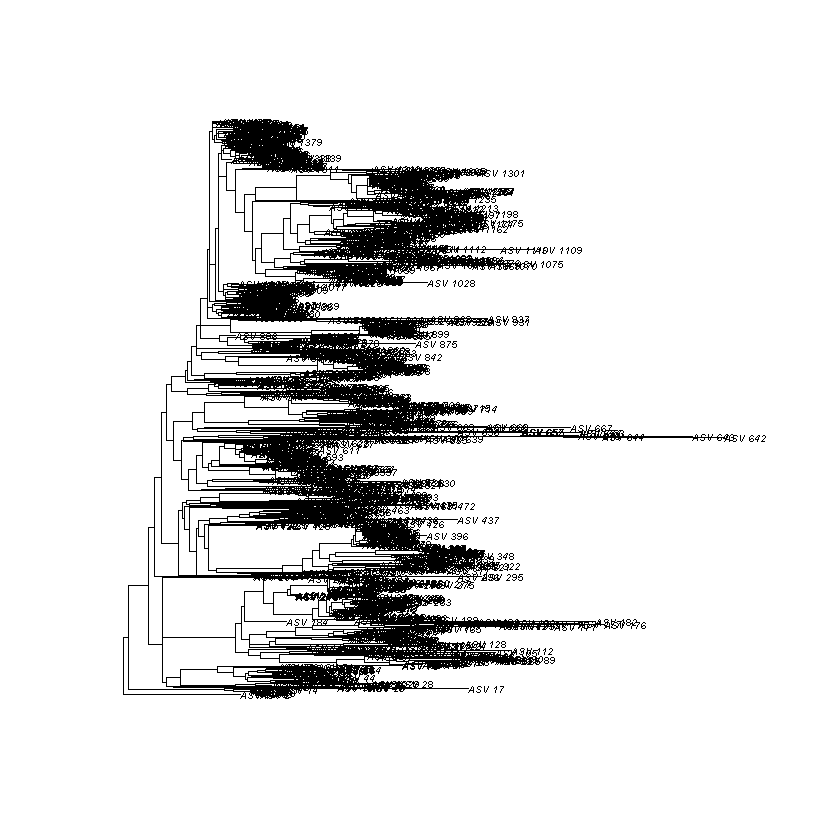

In [15]:
plot(phy_tree(phy), cex = 0.5)

## refseq<a class="anchor" id="seq"></a>
refseq contains the actual DNA sequences of our ASVs (or alternatively the reference sequences of OTUs). We can access it with the refseq() function.

In [16]:
refseq(phy)

  A DNAStringSet instance of length 1428
       width seq                                            names               
   [1]   237 TGGCGAGCGTTGTTCGGATTTA...GAAAGACGAAAGCATGGGGAG ASV_1
   [2]   236 TCACAAGCGTTATCCGGATTTA...GAAGCGCGAAAGCGTGGGTAG ASV_2
   [3]   236 TCACAAGCGTTATCCGGATTTA...GAAGCGCGAAAGCGTGGGTAG ASV_3
   [4]   236 TCACAAGCGTTATCCGGATTTA...GAAGCGCGAAAGCGTGGGTAG ASV_4
   [5]   236 TCACAAGCGTTATCCGGATTTA...GAAGCGCGAAAGCGTGGGTAG ASV_5
   ...   ... ...
[1424]   237 GGGCAAGCGTTATCCGGATTTA...GAGGCTCGAAAGCGTGGGGAG ASV_1424
[1425]   237 GGGCAAGCGTTATCCGGATTTA...GAGGCTCGAAAGCGTGGGGAG ASV_1425
[1426]   237 GGGCAAGCGTTATCCGGATTTA...GAGGCTCGAAAGCGTGGGGAG ASV_1426
[1427]   237 GGGCAAGCGTTATCCGGATTTA...GAGGCTCGAAAGCGTGGGGAG ASV_1427
[1428]   237 GGGCAAGCGTTATCCGGATTTA...GAGGCTCGAAAGCGTGGGGAG ASV_1428

Again, we can subset with the [ ] notation

In [17]:
refseq(phy)["ASV_1"]

  A DNAStringSet instance of length 1
    width seq                                               names               
[1]   237 TGGCGAGCGTTGTTCGGATTTAT...CTGAAAGACGAAAGCATGGGGAG ASV_1

To see the entire sequence, convert it to a string ("character" in R jargon)

In [18]:
as.character(refseq(phy)[c("ASV_10", "ASV_2")])

ASV_10 
"TCACAAGCGTTATCCGGATTTATTGGGCGTAAAGCGCGTCTAGGTGGTTATGTAAGTCTGATGTGAAAATGCAGGGCTCAACTCTGTATTGCGTTGGAAACTGCATGACTAGAGTACTGGAGAGGTAAGCGGAACTACAAGTGTAGAGGTGAAATTCGTAGATATTTGTAGGAATGCCGATGGGGAAGCCAGCTTACTGGACAGATACTGACGCTAAAGCGCGAAAGCGTGGGTAG" 
                                                                                                                                                                                                                                         ASV_2 
"TCACAAGCGTTATCCGGATTTATTGGGCGTAAAGCGCGTCTAGGTGGTTATATAAGTCTGATGTGAAAATGCAGGGCTCAACTCTGTATTGCGTTGGAAACTGTGTAACTAGAGTACTGGAGAGGTAAGCGGAACTACAAGTGTAGAGGTGAAATTCGTAGATATTTGTAGGAATGCCGATGGGGAAGCCAGCTTACTGGACAGATACTGACGCTGAAGCGCGAAAGCGTGGGTAG"